<a href="https://colab.research.google.com/github/pennapha12/Python_dataviz2024/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/for_work/basic_python'


In [ ]:
movie_file_path = os.path.join(path,'IMDb Movies India.csv')
print(movie_file_path )

/content/drive/MyDrive/for_work/basic_python/IMDb Movies India.csv


In [ ]:
data_in= pd.read_csv(movie_file_path,encoding='latin-1')
data_in.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
# Group by Director and calculate the mean rating for each director
mean_rating_by_director = data_in.groupby('Director')['Rating'].mean()

# Function to fill NaN values in Rating column using director's mean rating
def fill_rating_with_director_mean(row):
    if pd.isnull(row['Rating']):
        director = row['Director']
        if director in mean_rating_by_director:
            return mean_rating_by_director[director]
    return row['Rating']

# Apply the function to fill NaN values in Rating column
data_in['Rating'] = data_in.apply(fill_rating_with_director_mean, axis=1)

# Fill any remaining NaN values in Rating with overall mean rating
data_in['Rating'].fillna(data_in['Rating'].mean(), inplace=True)



In [ ]:
df1 = data_in[data_in[['Name','Genre','Director','Rating']].notna().all(axis=1)][['Name','Genre','Director','Rating']]

In [ ]:
df1

,Name,Genre,Director,Rating
0,,Drama,J.S. Randhawa,5.700000
1,#Gadhvi (He thought he was Gandhi),Drama,Gaurav Bakshi,7.000000
2,#Homecoming,"Drama, Musical",Soumyajit Majumdar,5.844000
3,#Yaaram,"Comedy, Romance",Ovais Khan,4.400000
4,...And Once Again,Drama,Amol Palekar,6.333333
...,...,...,...,...
15503,Zulm Ki Zanjeer,"Action, Crime, Drama",S.P. Muthuraman,5.800000
15504,Zulm Ko Jala Doonga,Action,Mahendra Shah,4.600000
15505,Zulmi,"Action, Drama",Kuku Kohli,4.500000
15506,Zulmi Raj,Action,Kiran Thej,5.844000


In [ ]:
# Kanti Shah
# Hrishikesh Mukherjee
# Babubhai Mistry     สร้างหนังกี่เรื่อง เป็นประเภทไหนบ้าง

# Filter the DataFrame to include only movies directed by the specified directors.
directors_of_interest = ['Kanti Shah', 'Hrishikesh Mukherjee', 'Babubhai Mistry']
movies_by_directors = df1[df1['Director'].isin(directors_of_interest)]

# Group by Director and Genre, then count the number of movies in each genre.
movie_counts_by_director_and_genre = movies_by_directors.groupby(['Director', 'Genre'])['Name'].count().reset_index()

# Rename the 'Name' column to 'Number_of_Movies' for clarity.
movie_counts_by_director_and_genre = movie_counts_by_director_and_genre.rename(columns={'Name': 'Number_of_Movies'})

# Print the results.
movie_counts_by_director_and_genre


,Director,Genre,Number_of_Movies
0,Babubhai Mistry,Action,2
1,Babubhai Mistry,"Action, Adventure",1
2,Babubhai Mistry,"Action, Adventure, Comedy",1
3,Babubhai Mistry,"Action, Adventure, Drama",2
4,Babubhai Mistry,"Action, Adventure, Fantasy",2
5,Babubhai Mistry,"Action, Comedy, Crime",1
6,Babubhai Mistry,"Action, Crime",1
7,Babubhai Mistry,"Action, Fantasy",1
8,Babubhai Mistry,"Action, History",1
9,Babubhai Mistry,"Adventure, Drama",1


In [ ]:
# Create a new DataFrame with expanded rows for each genre
new_rows = []
for index, row in movie_counts_by_director_and_genre.iterrows():
    genres = row['Genre'].split(', ')
    for genre in genres:
        new_rows.append([row['Director'], genre, row['Number_of_Movies']])

# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(new_rows, columns=['Director', 'Genre', 'Number_of_Movies'])

# Display the new DataFrame
print(expanded_df)



            Director      Genre  Number_of_Movies
0    Babubhai Mistry     Action                 2
1    Babubhai Mistry     Action                 1
2    Babubhai Mistry  Adventure                 1
3    Babubhai Mistry     Action                 1
4    Babubhai Mistry  Adventure                 1
..               ...        ...               ...
117       Kanti Shah      Drama                 1
118       Kanti Shah    Romance                 1
119       Kanti Shah     Horror                12
120       Kanti Shah    Romance                 2
121       Kanti Shah   Thriller                 4

[122 rows x 3 columns]


In [ ]:
# Group by 'Director' and 'Genre' and sum the 'Number_of_Movies'
aggregated_df = expanded_df.groupby(['Director', 'Genre'])['Number_of_Movies'].sum().reset_index()

# Display the aggregated DataFrame
print(aggregated_df)


                Director      Genre  Number_of_Movies
0        Babubhai Mistry     Action                14
1        Babubhai Mistry  Adventure                18
2        Babubhai Mistry     Comedy                 3
3        Babubhai Mistry      Crime                 3
4        Babubhai Mistry      Drama                17
5        Babubhai Mistry     Family                 2
6        Babubhai Mistry    Fantasy                19
7        Babubhai Mistry    History                 4
8        Babubhai Mistry    Romance                 1
9        Babubhai Mistry   Thriller                 1
10  Hrishikesh Mukherjee     Action                 1
11  Hrishikesh Mukherjee     Comedy                16
12  Hrishikesh Mukherjee      Crime                 1
13  Hrishikesh Mukherjee      Drama                32
14  Hrishikesh Mukherjee     Family                 7
15  Hrishikesh Mukherjee    Fantasy                 1
16  Hrishikesh Mukherjee    Musical                 7
17  Hrishikesh Mukherjee    

In [ ]:
# Filter the dataframe to include only rows where the Genre contains 'Drama', 'Action', 'Fantasy', or 'Comedy'.
df_filtered = df1[df1['Genre'].str.contains('Drama|Action|Fantasy|Comedy|Horror', case=False, na=False)]

# Display the filtered dataframe.
df_filtered


,Name,Genre,Director,Rating
0,,Drama,J.S. Randhawa,5.700000
1,#Gadhvi (He thought he was Gandhi),Drama,Gaurav Bakshi,7.000000
2,#Homecoming,"Drama, Musical",Soumyajit Majumdar,5.844000
3,#Yaaram,"Comedy, Romance",Ovais Khan,4.400000
4,...And Once Again,Drama,Amol Palekar,6.333333
...,...,...,...,...
15503,Zulm Ki Zanjeer,"Action, Crime, Drama",S.P. Muthuraman,5.800000
15504,Zulm Ko Jala Doonga,Action,Mahendra Shah,4.600000
15505,Zulmi,"Action, Drama",Kuku Kohli,4.500000
15506,Zulmi Raj,Action,Kiran Thej,5.844000


In [ ]:
# Group by Director and count the number of movies
director_counts = df_filtered.groupby('Director')['Name'].count()

# Sort the counts in descending order
director_counts_sorted = director_counts.sort_values(ascending=False)

# Display the sorted counts
director_counts_sorted.head(10)


,Name
Director,
Kanti Shah,51
Mahesh Bhatt,46
David Dhawan,44
Hrishikesh Mukherjee,39
Babubhai Mistry,38
Ram Gopal Varma,36
Shibu Mitra,34
B.R. Ishara,34
Rama Rao Tatineni,34


In [ ]:
# prompt: เลือก หนังที่ Kanti Shah,Hrishikesh Mukherjee,Babubhai Mistry สร้าง

directors_to_filter = ['Kanti Shah', 'Mahesh Bhatt','David Dhawan','Hrishikesh Mukherjee']
df_selected_directors = df_filtered[df_filtered['Director'].isin(directors_to_filter)]
df_selected_directors


,Name,Genre,Director,Rating
227,Aag Andhi Aur Toofan,"Action, Thriller",Kanti Shah,3.100000
229,Aag Aur Chingari,Action,Kanti Shah,4.100000
239,Aag Ka Gola,"Action, Drama",David Dhawan,4.800000
242,Aag Ka Toofaan,Action,Kanti Shah,4.800000
244,Aag Ke Sholay,Action,Kanti Shah,4.997368
...,...,...,...,...
15186,Yaraana,"Action, Drama, Musical",David Dhawan,4.700000
15232,Yeh Hai Jalwa,"Comedy, Drama, Romance",David Dhawan,4.700000
15235,Yeh Hai Mumbai Meri Jaan,"Action, Comedy, Romance",Mahesh Bhatt,4.400000
15341,Zakhm,Drama,Mahesh Bhatt,7.900000


In [ ]:
import pandas as pd

# Create a new DataFrame with only the relevant columns.
df_genres = df_selected_directors[['Director', 'Genre']].copy()

# Define a function to extract and categorize genres.
def categorize_genre(genre_str):
    genres = []
    if 'Drama' in genre_str:
        genres.append('Drama')
    if 'Action' in genre_str:
        genres.append('Action')
    if 'Fantasy' in genre_str:
        genres.append('Fantasy')
    if 'Comedy' in genre_str:
        genres.append('Comedy')
    if 'Horror' in genre_str:
        genres.append('Horror')
    return genres


# Apply the function to create a list of genres for each movie.
df_genres['Genres_List'] = df_genres['Genre'].apply(categorize_genre)

# Explode the list of genres to create a new row for each genre.
df_genres_exploded = df_genres.explode('Genres_List')

# Group by director and genre to count the number of movies in each genre.
df_director_genre_counts = df_genres_exploded.groupby(['Director', 'Genres_List'])['Genres_List'].count().reset_index(name='Count')

# Display the result.
print(df_director_genre_counts)



                Director Genres_List  Count
0           David Dhawan      Action     23
1           David Dhawan      Comedy     37
2           David Dhawan       Drama     22
3   Hrishikesh Mukherjee      Action      1
4   Hrishikesh Mukherjee      Comedy     16
5   Hrishikesh Mukherjee       Drama     32
6   Hrishikesh Mukherjee     Fantasy      1
7             Kanti Shah      Action     30
8             Kanti Shah      Comedy      2
9             Kanti Shah       Drama     12
10            Kanti Shah     Fantasy      1
11            Kanti Shah      Horror     12
12          Mahesh Bhatt      Action     21
13          Mahesh Bhatt      Comedy      5
14          Mahesh Bhatt       Drama     37
15          Mahesh Bhatt      Horror      1


In [ ]:
df_director_genre_counts['Count'].sum()

253

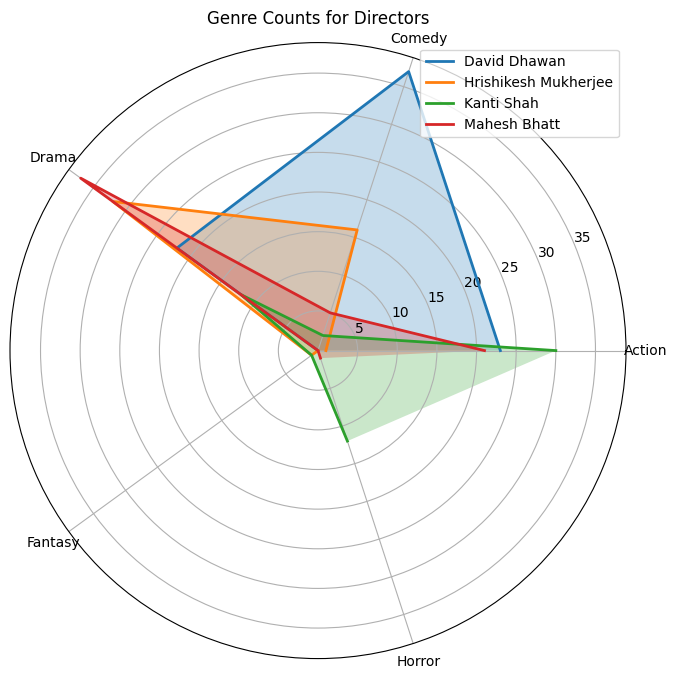

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of unique genres
genres = df_director_genre_counts['Genres_List'].unique()

# Create a dictionary to store the genre counts for each director
director_genre_counts = {}
for director in df_director_genre_counts['Director'].unique():
    director_genre_counts[director] = [0] * len(genres)

# Fill in the genre counts for each director
for index, row in df_director_genre_counts.iterrows():
    director = row['Director']
    genre = row['Genres_List']
    count = row['Count']
    genre_index = np.where(genres == genre)[0][0]
    director_genre_counts[director][genre_index] = count

# Create the spider chart
labels = genres
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for director, counts in director_genre_counts.items():
    ax.plot(angles, counts, linewidth=2, label=director)
    ax.fill(angles + [angles[0]], counts + [counts[0]], alpha=0.25)

plt.xticks(angles, labels)
plt.legend(loc='upper right')
plt.title('Genre Counts for Directors')
plt.show()


In [ ]:
# prompt: จากกราฟด้านบน สร้างตาราง แสงสรุปผล

import pandas as pd
# Create a pivot table to summarize the results
summary_table = pd.pivot_table(df_director_genre_counts, values='Count', index='Director', columns='Genres_List', aggfunc='sum', fill_value=0)

# Display the summary table
summary_table


Genres_List,Action,Comedy,Drama,Fantasy,Horror
Director,,,,,
David Dhawan,23,37,22,0,0
Hrishikesh Mukherjee,1,16,32,1,0
Kanti Shah,30,2,12,1,12
Mahesh Bhatt,21,5,37,0,1


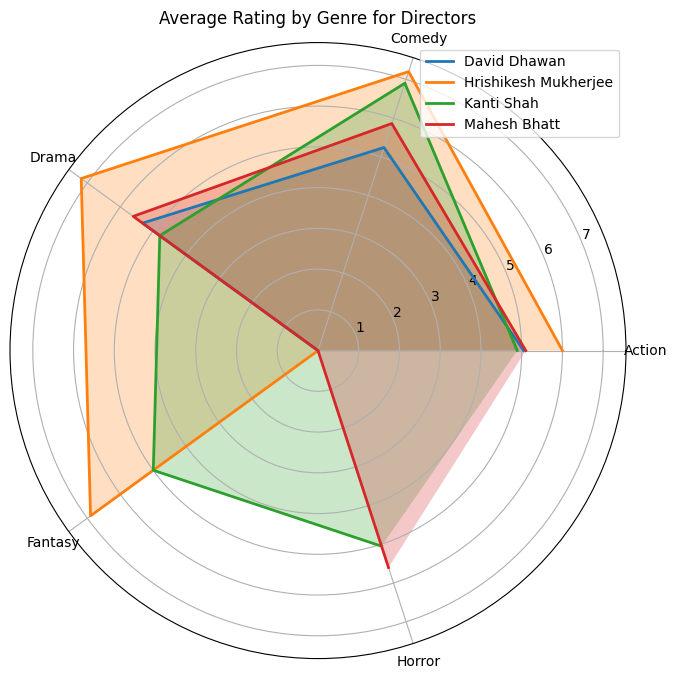

In [ ]:
# prompt: สร้าง spider chart จาก df_director_genre_counts โดยรอบเป็นผู้กำกับ ด้านในเป็นประเภททั้งสี่ แสดงเรตติ้งเฉลี่ย

import matplotlib.pyplot as plt
import numpy as np

# Create a new DataFrame with only the relevant columns.
df_genres_rating = df_selected_directors[['Director', 'Genre', 'Rating']].copy()

# Apply the function to create a list of genres for each movie.
df_genres_rating['Genres_List'] = df_genres_rating['Genre'].apply(categorize_genre)

# Explode the list of genres to create a new row for each genre.
df_genres_rating_exploded = df_genres_rating.explode('Genres_List')

# Group by director and genre to get the average rating for each genre.
df_director_genre_avg_rating = df_genres_rating_exploded.groupby(['Director', 'Genres_List'])['Rating'].mean().reset_index(name='Avg_Rating')

# Create a list of unique genres
genres = df_director_genre_avg_rating['Genres_List'].unique()

# Create a dictionary to store the genre counts for each director
director_genre_avg_ratings = {}
for director in df_director_genre_avg_rating['Director'].unique():
    director_genre_avg_ratings[director] = [0] * len(genres)

# Fill in the genre counts for each director
for index, row in df_director_genre_avg_rating.iterrows():
    director = row['Director']
    genre = row['Genres_List']
    avg_rating = row['Avg_Rating']
    genre_index = np.where(genres == genre)[0][0]
    director_genre_avg_ratings[director][genre_index] = avg_rating

# Create the spider chart
labels = genres
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for director, avg_ratings in director_genre_avg_ratings.items():
    ax.plot(angles, avg_ratings, linewidth=2, label=director)
    ax.fill(angles + [angles[0]], avg_ratings + [avg_ratings[0]], alpha=0.25)

plt.xticks(angles, labels)
plt.legend(loc='upper right')
plt.title('Average Rating by Genre for Directors')
plt.show()



In [ ]:
# prompt: จากกราฟด้านบน สร้างตารางสรุปผลใหม่ สำหรับกราฟนี้เท่านั้น

import pandas as pd
# Create a pivot table to summarize the results
summary_table_avg_rating = pd.pivot_table(df_director_genre_avg_rating, values='Avg_Rating', index='Director', columns='Genres_List', aggfunc='mean', fill_value=0)

# Display the summary table
summary_table_avg_rating


Genres_List,Action,Comedy,Drama,Fantasy,Horror
Director,,,,,
David Dhawan,5.047826,5.240352,5.322727,0.000000,0.000000
Hrishikesh Mukherjee,6.000000,7.200000,7.184375,6.900000,0.000000
Kanti Shah,4.889474,6.900000,4.799342,4.997368,5.048904
Mahesh Bhatt,5.100000,5.860000,5.605405,0.000000,5.600000


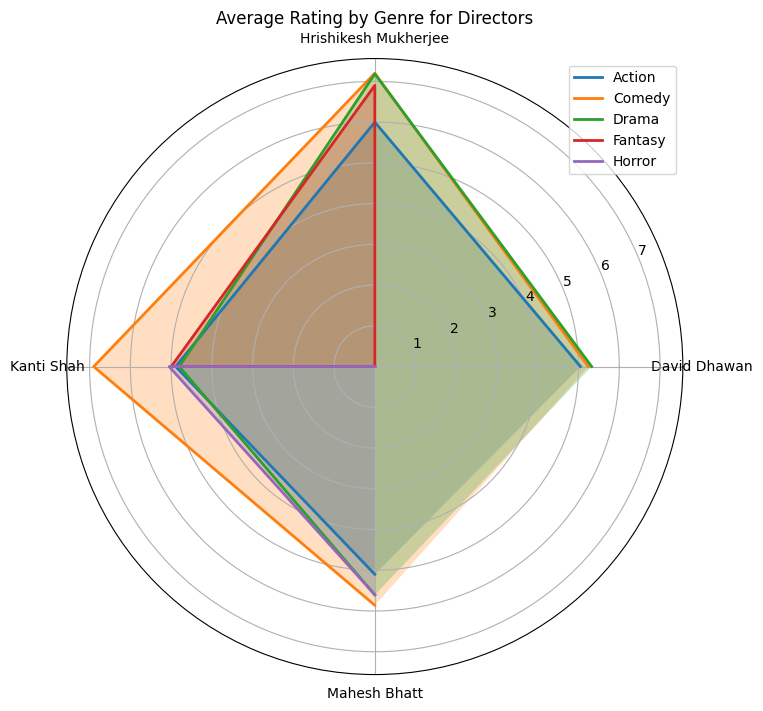

In [ ]:
 chart จาก df_director_genre_counts โดยรอบเป็นผู้กำกับ ด้านในเป็นประเภททั้งสี่ แสดงเรตติ้งเฉลี่ย

import matplotlib.pyplot as plt
import numpy as np

# Create a new DataFrame with only the relevant columns.
df_genres_rating = df_selected_directors[['Director', 'Genre', 'Rating']].copy()

# Apply the function to create a list of genres for each movie.
df_genres_rating['Genres_List'] = df_genres_rating['Genre'].apply(categorize_genre)

# Explode the list of genres to create a new row for each genre.
df_genres_rating_exploded = df_genres_rating.explode('Genres_List')

# Group by director and genre to get the average rating for each genre.
df_director_genre_avg_rating = df_genres_rating_exploded.groupby(['Director', 'Genres_List'])['Rating'].mean().reset_index(name='Avg_Rating')

# Create a list of unique genres
genres = df_director_genre_avg_rating['Director'].unique()

# Create a dictionary to store the genre counts for each director
director_genre_avg_ratings = {}
for director in df_director_genre_avg_rating['Genres_List'].unique():
    director_genre_avg_ratings[director] = [0] * len(genres)

# Fill in the genre counts for each director
for index, row in df_director_genre_avg_rating.iterrows():
    director = row['Genres_List']
    genre = row['Director']
    avg_rating = row['Avg_Rating']
    genre_index = np.where(genres == genre)[0][0]
    director_genre_avg_ratings[director][genre_index] = avg_rating

# Create the spider chart
labels = genres
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for director, avg_ratings in director_genre_avg_ratings.items():
    ax.plot(angles, avg_ratings, linewidth=2, label=director)
    ax.fill(angles + [angles[0]], avg_ratings + [avg_ratings[0]], alpha=0.25)

plt.xticks(angles, labels)
plt.legend(loc='upper right')
plt.title('Average Rating by Genre for Directors')
plt.show()

#Edit


In [ ]:
df=data_in.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
import pandas as pd

df['Time_movie'] = pd.to_numeric(df['Duration'].str.replace(' min', ''), errors='coerce')
df['Time_movie'] = df['Time_movie'].fillna(df['Time_movie'].mean()).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        15509 non-null  object 
 1   Year        14981 non-null  object 
 2   Duration    7240 non-null   object 
 3   Genre       13632 non-null  object 
 4   Rating      7919 non-null   float64
 5   Votes       7920 non-null   object 
 6   Director    14984 non-null  object 
 7   Actor 1     13892 non-null  object 
 8   Actor 2     13125 non-null  object 
 9   Actor 3     12365 non-null  object 
 10  Time_movie  15509 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 1.3+ MB


In [ ]:
from datetime import datetime

In [ ]:
import pandas as pd
# Assuming 'df' is your DataFrame

# Remove parentheses and any surrounding whitespace from the 'Year' column
df['Year'] = df['Year'].str.replace(r'[()\s]', '', regex=True)

# Convert the cleaned 'Year' column to datetime objects
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce').dt.year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        15509 non-null  object 
 1   Year        14981 non-null  float64
 2   Duration    7240 non-null   object 
 3   Genre       13632 non-null  object 
 4   Rating      7919 non-null   float64
 5   Votes       7920 non-null   object 
 6   Director    14984 non-null  object 
 7   Actor 1     13892 non-null  object 
 8   Actor 2     13125 non-null  object 
 9   Actor 3     12365 non-null  object 
 10  Time_movie  15509 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
df['Year'].unique()

array([  nan, 2019., 2021., 2010., 1997., 2005., 2008., 2012., 2014.,
       2004., 2016., 1991., 1990., 2018., 1987., 1948., 1958., 2017.,
       2020., 2009., 2002., 1993., 1946., 1994., 2007., 2013., 2003.,
       1998., 1979., 1951., 1956., 1974., 2015., 2006., 1981., 1985.,
       2011., 2001., 1967., 1988., 1995., 1959., 1996., 1970., 1976.,
       2000., 1999., 1973., 1968., 1943., 1953., 1986., 1983., 1989.,
       1982., 1977., 1957., 1950., 1992., 1969., 1975., 1947., 1972.,
       1971., 1935., 1978., 1960., 1944., 1963., 1940., 1984., 1934.,
       1955., 1936., 1980., 1966., 1949., 1962., 1964., 1952., 1933.,
       1942., 1939., 1954., 1945., 1961., 1965., 1938., 1941., 1931.,
       1937., 2022., 1932., 1923., 1915., 1928., 1922., 1917., 1913.,
       1930., 1926., 1914., 1924.])

##Prepare Data

In [ ]:
ddf = df[df['Genre'].isin(['Action','Drama','Fantasy','Comedy','Horror'])]
ddf

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Time_movie
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,128
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,109
4,...And Once Again,2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,105
10,1:1.6 An Ode to Lost Love,2004.0,96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,96
11,1:13:7 Ek Tera Saath,2016.0,120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,120
...,...,...,...,...,...,...,...,...,...,...,...
15500,Zulm Ka Muqabla,1993.0,NaN,Action,NaN,NaN,Babu Antony,Nandamuri Balakrishna,Vijayshanti,NaN,128
15502,Zulm Ki Pukar,1979.0,NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha,128
15504,Zulm Ko Jala Doonga,1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,128
15506,Zulmi Raj,2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,128


In [ ]:
ddf['Rating']=ddf['Rating'].fillna(ddf['Rating'].mean())

<ipython-input-121-073cd14cc4a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Rating']=ddf['Rating'].fillna(ddf['Rating'].mean())


In [ ]:
ddf

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Time_movie
0,,NaN,NaN,Drama,5.898912,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,128
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,109
4,...And Once Again,2010.0,105 min,Drama,5.898912,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,105
10,1:1.6 An Ode to Lost Love,2004.0,96 min,Drama,6.200000,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,96
11,1:13:7 Ek Tera Saath,2016.0,120 min,Horror,5.900000,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,120
...,...,...,...,...,...,...,...,...,...,...,...
15500,Zulm Ka Muqabla,1993.0,NaN,Action,5.898912,NaN,Babu Antony,Nandamuri Balakrishna,Vijayshanti,NaN,128
15502,Zulm Ki Pukar,1979.0,NaN,Action,5.898912,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha,128
15504,Zulm Ko Jala Doonga,1988.0,NaN,Action,4.600000,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,128
15506,Zulmi Raj,2005.0,NaN,Action,5.898912,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,128


In [ ]:
ddf.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Time_movie'],
      dtype='object')

In [ ]:
# คำนวณ Mean, Standard Deviation, และ CV
metrics = ddf.groupby('Genre').agg(
    Mean_Rating=('Rating', 'mean'),
    Std_Rating=('Rating', 'std'),
    CV_Rating=('Rating', lambda x: (x.std() / x.mean()) * 100),
    Mean_Time=('Time_movie', 'mean'),
    Std_Time=('Time_movie', 'std'),
    CV_Time=('Time_movie', lambda x: (x.std() / x.mean()) * 100)
).reset_index()

# แสดงผลลัพธ์
print(metrics)

     Genre  Mean_Rating  Std_Rating  CV_Rating   Mean_Time   Std_Time  \
0   Action     5.638054    0.807633  14.324678  128.536074  12.032777   
1   Comedy     5.796451    0.968358  16.706057  125.117172  16.002353   
2    Drama     6.090775    0.840563  13.800595  124.690647  18.147470   
3  Fantasy     5.996227    0.701461  11.698373  129.329412  13.001491   
4   Horror     5.392826    1.057923  19.617231  121.027950  17.172276   

     CV_Time  
0   9.361400  
1  12.789894  
2  14.553995  
3  10.053004  
4  14.188686  


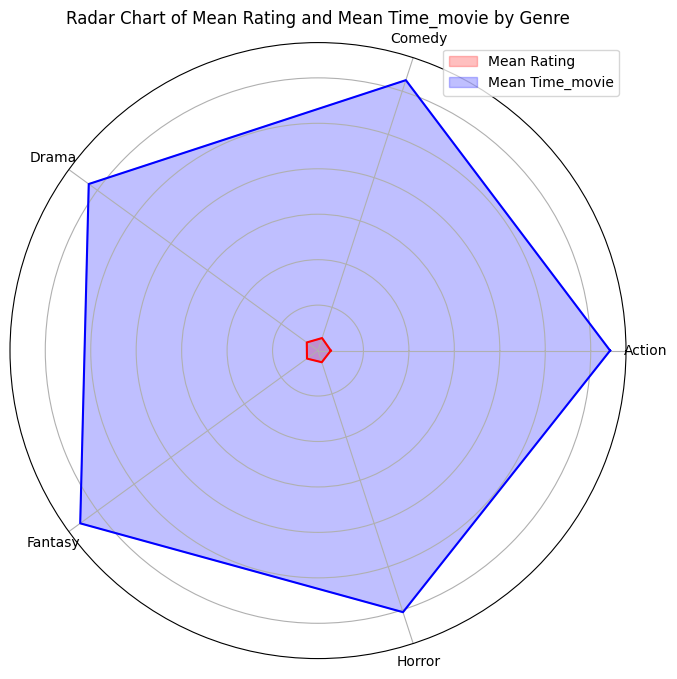

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# เตรียมข้อมูลสำหรับ Radar Chart
categories = metrics['Genre'].tolist()
mean_ratings = metrics['Mean_Rating'].tolist()
mean_times = metrics['Mean_Time'].tolist()

# ข้อมูลที่จะแสดงในกราฟ
values_ratings = mean_ratings + [mean_ratings[0]]  # ปิดวงรอบ
values_times = mean_times + [mean_times[0]]  # ปิดวงรอบ

# กำหนดมุมในกราฟ
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # ปิดวงรอบ

# สร้าง Radar Chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# วาดกราฟสำหรับ Mean Rating
ax.fill(angles, values_ratings, color='red', alpha=0.25, label='Mean Rating')
ax.plot(angles, values_ratings, color='red')

# วาดกราฟสำหรับ Mean Time_movie
ax.fill(angles, values_times, color='blue', alpha=0.25, label='Mean Time_movie')
ax.plot(angles, values_times, color='blue')

# เลเบลและการตั้งค่า
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.legend(loc='upper right')
plt.title('Radar Chart of Mean Rating and Mean Time_movie by Genre')
plt.show()


##CV %

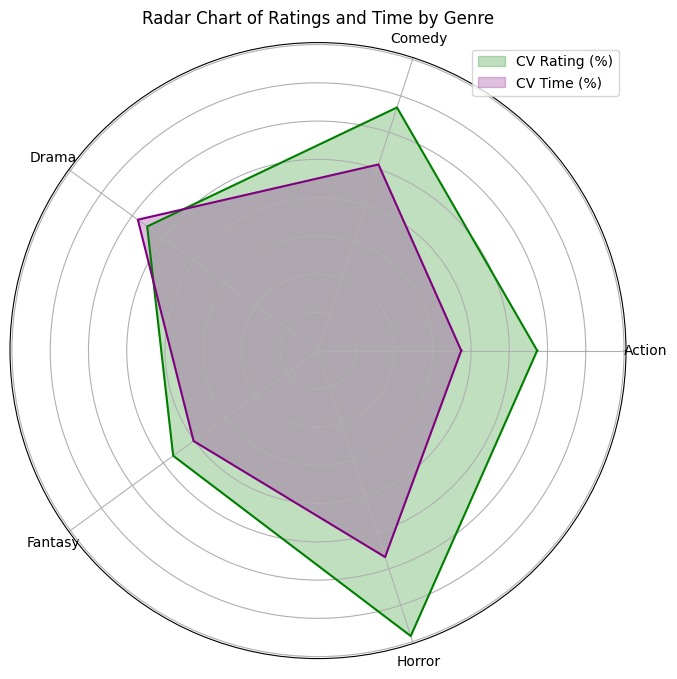

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# คำนวณ Mean, Standard Deviation, และ CV
metrics = ddf.groupby('Genre').agg(
    Mean_Rating=('Rating', 'mean'),
    Std_Rating=('Rating', 'std'),
    CV_Rating=('Rating', lambda x: (x.std() / x.mean()) * 100),
    Mean_Time=('Time_movie', 'mean'),
    Std_Time=('Time_movie', 'std'),
    CV_Time=('Time_movie', lambda x: (x.std() / x.mean()) * 100)
).reset_index()

#
# คำนวณ CV
df['CV_Rating'] = (metrics['Std_Rating'] / metrics['Mean_Rating']) * 100
df['CV_Time'] = (metrics['Std_Time'] / metrics['Mean_Time']) * 100

# เตรียมข้อมูลสำหรับ Radar Chart
categories = metrics['Genre'].tolist()
mean_ratings = metrics['Mean_Rating'].tolist()
mean_times = metrics['Mean_Time'].tolist()
cv_ratings = metrics['CV_Rating'].tolist()
cv_times = metrics['CV_Time'].tolist()

# ปิดวงรอบ
mean_ratings += [mean_ratings[0]]
mean_times += [mean_times[0]]
cv_ratings += [cv_ratings[0]]
cv_times += [cv_times[0]]

# กำหนดมุมในกราฟ
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # ปิดวงรอบ

# สร้าง Radar Chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))


# วาดกราฟสำหรับ CV Rating
ax.fill(angles, cv_ratings, color='green', alpha=0.25, label='CV Rating (%)')
ax.plot(angles, cv_ratings, color='green')

# วาดกราฟสำหรับ CV Time
ax.fill(angles, cv_times, color='purple', alpha=0.25, label='CV Time (%)')
ax.plot(angles, cv_times, color='purple')

# เลเบลและการตั้งค่า
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.legend(loc='upper right')
plt.title('Radar Chart of Ratings and Time by Genre')
plt.show()


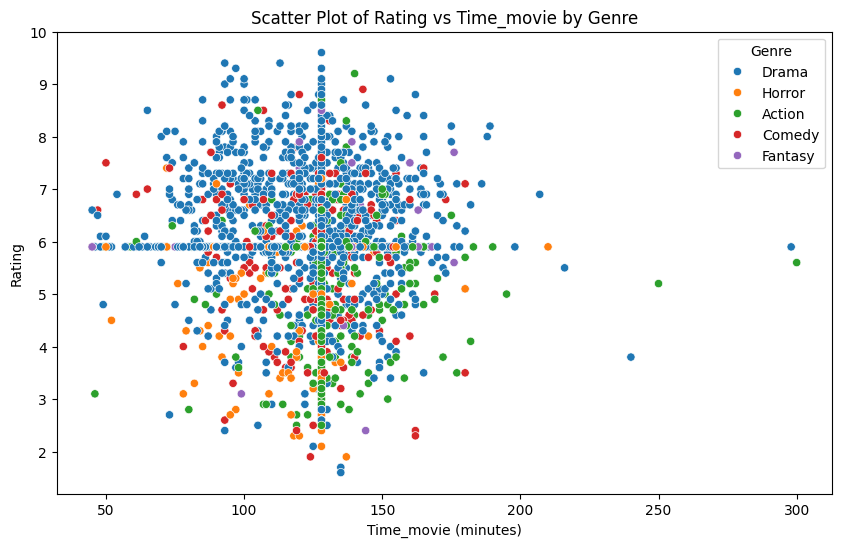

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time_movie', y='Rating', hue='Genre', data=ddf)
plt.title('Scatter Plot of Rating vs Time_movie by Genre')
plt.xlabel('Time_movie (minutes)')
plt.ylabel('Rating')
plt.legend(title='Genre')
plt.show()


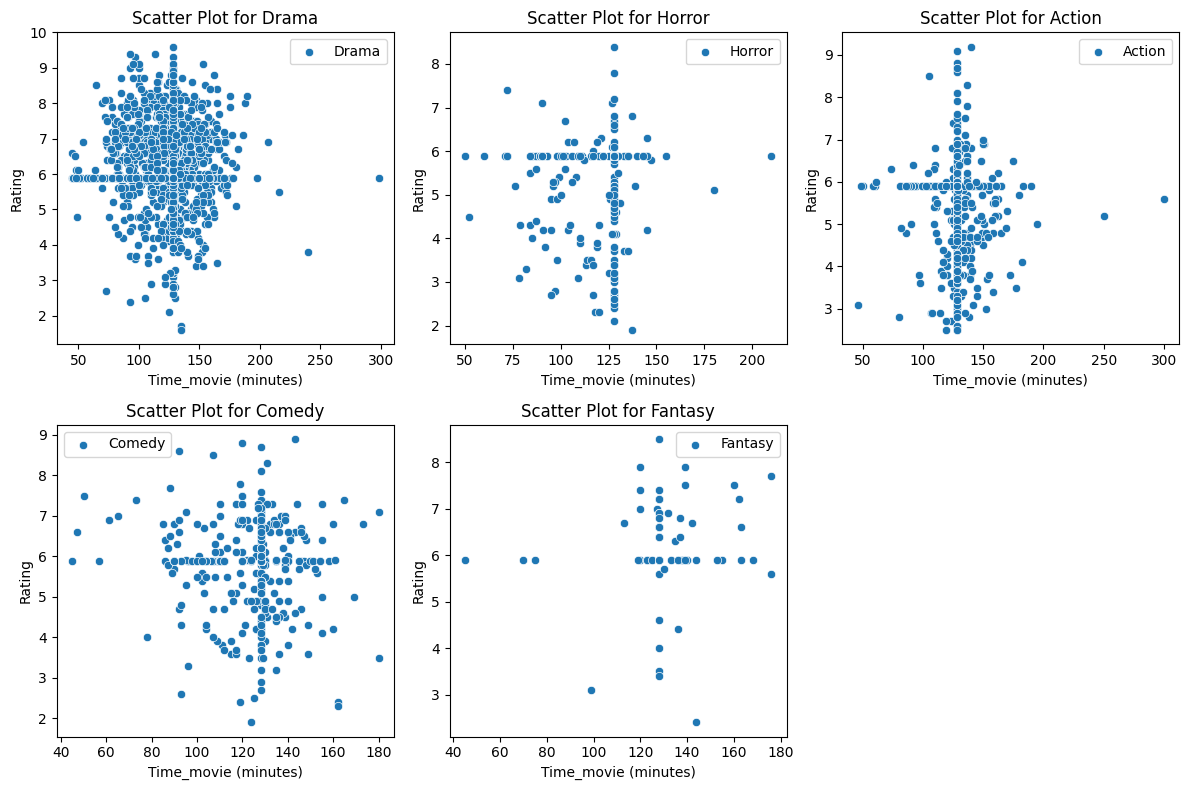

In [ ]:
# prompt: จาก Scaterplot ด้านบน แสดงแยกแต่ละ Genre ไม่เอาไว้ในกราฟเดียวกัน

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

# Iterate through unique genres
for genre in ddf['Genre'].unique():
    # Filter the DataFrame for the current genre
    df_genre = ddf[ddf['Genre'] == genre]

    # Create a subplot for the current genre
    plt.subplot(2, 3, list(ddf['Genre'].unique()).index(genre) + 1)
    sns.scatterplot(x='Time_movie', y='Rating', data=df_genre, label=genre)
    plt.title(f'Scatter Plot for {genre}')
    plt.xlabel('Time_movie (minutes)')
    plt.ylabel('Rating')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# สร้างฟังก์ชันเพื่อคำนวณ correlation
def calculate_correlations(df):
    correlations = {}

    genres = ddf['Genre'].unique()
    for genre in genres:
        genre_data = ddf[ddf['Genre'] == genre]

        if len(genre_data) > 1:  # ตรวจสอบว่ามีข้อมูลพอสำหรับการคำนวณ
            pearson_corr, pearson_p_value = pearsonr(genre_data['Rating'], genre_data['Time_movie'])
            spearman_corr, spearman_p_value = spearmanr(genre_data['Rating'], genre_data['Time_movie'])
            correlations[genre] = {
                'Pearson Correlation': pearson_corr,
                'Pearson p-value': pearson_p_value,
                'Spearman Correlation': spearman_corr,
                'Spearman p-value': spearman_p_value
            }

    return correlations

# คำนวณ correlations
correlation_results = calculate_correlations(ddf)

# แสดงผลลัพธ์
for genre, metrics in correlation_results.items():
    print(f"Genre: {genre}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.2f}")
    print()


Genre: Drama
  Pearson Correlation: -0.07
  Pearson p-value: 0.00
  Spearman Correlation: -0.05
  Spearman p-value: 0.00

Genre: Horror
  Pearson Correlation: 0.08
  Pearson p-value: 0.15
  Spearman Correlation: 0.12
  Spearman p-value: 0.03

Genre: Action
  Pearson Correlation: -0.02
  Pearson p-value: 0.40
  Spearman Correlation: -0.05
  Spearman p-value: 0.07

Genre: Comedy
  Pearson Correlation: -0.08
  Pearson p-value: 0.08
  Spearman Correlation: -0.02
  Spearman p-value: 0.66

Genre: Fantasy
  Pearson Correlation: 0.13
  Pearson p-value: 0.09
  Spearman Correlation: 0.05
  Spearman p-value: 0.50



In [ ]:
pd.DataFrame(correlation_results)

,Drama,Horror,Action,Comedy,Fantasy
Pearson Correlation,-0.068349,0.079850,-0.023528,-0.078000,0.131867
Pearson p-value,0.000311,0.152841,0.398663,0.082982,0.086502
Spearman Correlation,-0.053611,0.123310,-0.050087,-0.020100,0.052611
Spearman p-value,0.004692,0.026927,0.072235,0.655520,0.495636


In [ ]:
import pandas as pd
from scipy.stats import kruskal
# สร้างฟังก์ชันเพื่อทำการทดสอบ Kruskal-Wallis
def kruskal_test(df, column):
    genres = ddf['Genre'].unique()
    groups = [ddf[ddf['Genre'] == genre][column].values for genre in genres]

    # ทำการทดสอบ Kruskal-Wallis
    stat, p_value = kruskal(*groups)

    return stat, p_value

# ทำการทดสอบ Kruskal-Wallis สำหรับ Rating และ Time_movie
rating_stat, rating_p_value = kruskal_test(ddf, 'Rating')
time_stat, time_p_value = kruskal_test(ddf, 'Time_movie')

# แสดงผลลัพธ์
print(f"Kruskal-Wallis Test for Rating: H-statistic = {rating_stat:.2f}, p-value = {rating_p_value:.3f}")
print(f"Kruskal-Wallis Test for Time_movie: H-statistic = {time_stat:.2f}, p-value = {time_p_value:.3f}")

Kruskal-Wallis Test for Rating: H-statistic = 353.46, p-value = 0.000
Kruskal-Wallis Test for Time_movie: H-statistic = 78.82, p-value = 0.000
